### Efficient Text to SQL
Source: [Medium](https://medium.com/dataherald/high-accuracy-text-to-sql-with-langchain-840742133b83)

<b>KEYWORDS</b> </br>
Using `Dataherald API Wrapper` in `langchain` library
</br>
This api also delivers the result in matplotlib library

Notable Plotting tool
```python
# A function to plot a list
def plot_and_save_array(dict_of_values):
  dict_of_values = json.loads(dict_of_values.strip().replace("'", '"'))
  items = list(dict_of_values.keys())
  values = list(dict_of_values.values())
  plt.figure(figsize=(5, 3))
  plt.plot(items, values, marker='o')
  plt.title("Array Plot")
  plt.xlabel("Items")
  plt.ylabel("Values")
  plt.xticks(rotation=45)
  plt.grid(True)
  identifier = uuid.uuid4().hex[:6] + ".png"
  plt.savefig(identifier)
  plt.show()
  return "success"

plotting_tool = StructuredTool.from_function(
    func=plot_and_save_array,
    name="Plotting Results",
    description="A tool which receives a valid json object with keys being the x axes values and for each key we should have a single value",
)
```
***

### LLM App Levels
Source: [Youtube/ Neural Hacks](https://youtu.be/UIV_odcp-aw?si=cu905hfrsAYh7HEs)
</br>

*Top to Base (Most Complex to Least Complex)*
1. LLM OS
    - LLM which can control the os
    - Chars
      - Yes - In Context Memory, Externcal Knowledge, Tools & Peripheral Tools.
2. Agent
    - LLM which can do a given task autonomously is an agent.
    - It can acess to math, g_search, doc loader tools etc 
    - Chars
      - Yes - In Context Memory (Remember), External Knowledge & Tools
      - No -  Peripheral Tools
3. RAG
    - Chatbot or QA System with an external data source(pdf, webpages etc) for knowledge
    - Chars
      - Yes - In Context Memory (Remember) & External Knowledge
      - No - Tools & Peripheral Tools
4. Chat Bot
    - Having a sequence of conversation with LLMs
    - Just Raw ChatGPT Interactions
    - Chars
      - Yes - In Context Memory (Remember)
      - No - External Knowledge, Tools & Peripheral Tools
5. General QA
    - Answering questions based on self-knowledge or given a context
    - Just for intent extraction, complete sentence activity.
    - Chars
      - No - In Context Memory, External Knowledge, Tools, Peripheral Tools
***

### AI Agent the can CORRECT ITSELF<br> <b>Using Langgraph</b><br>
Source: [Youtube/ Neural Hack](https://youtu.be/q_mIl6o2fYs?si=evMHXIyE862m6gp5)

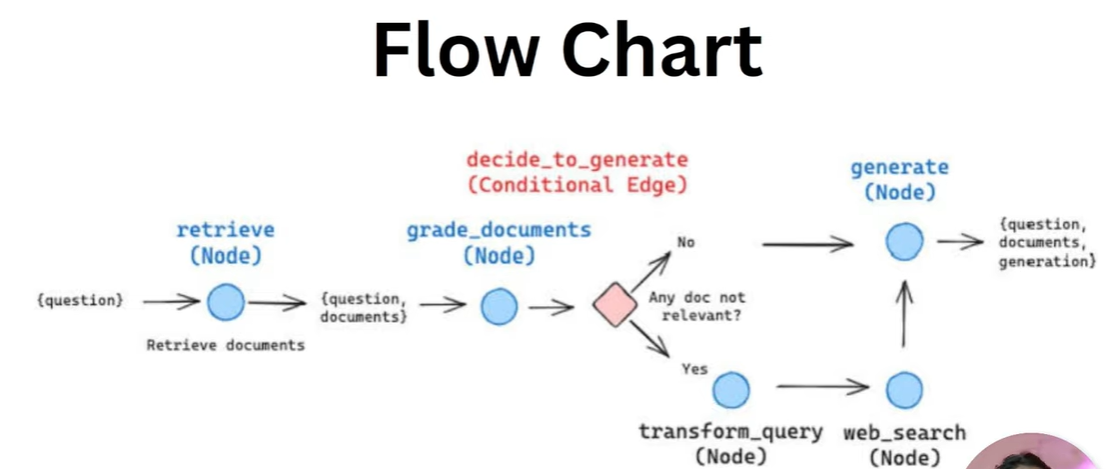

1. After setting the langchain, FAISS vector store and any LLM </br>
2. The agent we are using is Tavily which return the top 3 search results(web)
3. Create a class representing the above flow chart
4. from `langgraph.graph` and add the nodes from class 
5. Add conditions for the nodes
***

### Fine Tune Llama 3
Using Unsloth

Source [Youtube/ David Ondrej](https://youtu.be/pK8u4QfdLx0?si=CNhuL72XTTuq5S9s)

Resources: <br>
Notebook: [Colab Notebook](https://colab.research.google.com/drive/1efOx_rwZeF3i0YsirhM1xhYLtGNX6Fv3?usp=sharing#scrollTo=2eSvM9zX_2d3)
Dataset: [Hugging Face/ alpaca-cleaned](https://huggingface.co/datasets/yahma/alpaca-cleaned)

<b>How Does LLM Fine Tuning Works?</b>

1. High Quality, Smaller dataset for the use case, probably labelled.
2. Weight should be updated increamentally using optimization algorithms like gradient descent based on the dataset.
3. Model Evaluation
<br>

`Uses` are Tailored content generation, Domain specific analysis

```python
#Requirements
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# We will be using 4bit llama 3 8b
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/llama-3-8b-bnb-4bit", # Llama-3 70b also works (just change the model name)
    max_seq_length = max_seq_length, # upto 8k is fine
    dtype = dtype, #None
    load_in_4bit = load_in_4bit, #True to save memory
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)
``` 
<br>

- Using FastLanguageModel.get_peft_model to reduce unused parameters
- Load dataset and prepare it for LLM template
- Use SFT Trainer from trl library to build trainer and train the model
- Using the same FastLanguageModel to perform inference
    - FastLanguageModel.for_inference(model)
- save the model in a compact form, using merged_4bit or lora
- also we can try save the model by reduce its size using quantization method 8bit Q8_0, 16bit GGUF, q4_k_m GGUF

`Important note`
You can also use Hugging Face's AutoModelForPeftCausalLM. <br>
Only use this if you do not have unsloth installed. <br>
It can be hopelessly slow, since 4bit model downloading is not supported, <br>
and Unsloth's inference is 2x faster.

***

### Run Strongest Open-source LLM model: Llama3 70B with single 4GB GPU
Source: [Medium/ Gavin Li](https://ai.gopubby.com/run-the-strongest-open-source-llm-model-llama3-70b-with-just-a-single-4gb-gpu-7e0ea2ad8ba2),
[Git/ air_llm](https://github.com/lyogavin/Anima/tree/main/air_llm)
</br>
<b>Using airllm</b>

Key highlight:
`Note:` The model architecture of Llama3 has not changed
```python
!pip install airllm

from airllm import AutoModel
model = Automodel.from_pretrained("v2ray/Llama-3-70B")
input_text = ['What is the capital of Wakanda?']
input_tokens = model.tokenizer(
    input_text,
    return_tensors = 'pt',
    return_attention_mask = False,
    truncation = True,
    max_length = 128,
    padding = False
)
generation_output = model.generate(
    input_tokens['input_ids'].cuda(),
    max_new_tokens = 20,
    use_cache = True,
    return_dict_in_generate = True
)

output = model.tokenizer.decode(generation_output.sequences[0])
``` 
Important Notes:
1. No normal Quantization, distillation, pruning or other model compression techniques that 
would result in degraded model performance are need.
2. Using 4 or 8 bit block-wise quantization with negligible accuracy degradation.
3. It's not designed for real-time interactive scenaris like chatting but for data processing 
and other offline asynchronous scenarios
4. Llama3 70B is very close to GPT4
5. Core improvement in Llama3 is DPO based training approach and usage of very refined quality and quantity data.

***


### Pandas AI

Source: [Youtube/ Data Science in your pocket](https://www.youtube.com/watch?v=_tP2hcxA5tk)

Requirements: pip install pandasai[scikit-learn]

```python
import os
import pandas as pd
# Both SmartDataFrame and Agent can be used
from pandasai import SmartDataframe, Agent

# Create from web interface of pandas ai site
os.environ['PANDASAI_API_KEY'] = ''
df = Agent('titanic.csv')
df.chat('bar chart for PClass Column') # Produce a bar chart
df.chat('Give brief analysis of the dataframe') # provides the df description
df.chat('What % of passengers survived?') # 38.38% in user language
```

`Notes:`
1. Basically its convert natural language to pandas code like SQL Agent from langchain
2. Needs api key from pandas ai site

***

### Determinism in the AI Tech Stack (LLMs): 
Temperature, seeds and Tools
<br>

Source: [Youtube/ All about AI](https://www.youtube.com/watch?v=HjWbpfOrdjQ)
<br>

1. Model Providers
    - Foundational Models and Open Source
    - Ex: OpenAI, Meta, Mistral, Anthropic
2. LLM Orchestrator and Framework
    - Simplifies integration and development
    - Ex: Langchain, LlamaIndex
3. Vector Database
    - Stores and searches vector embeddings (Improve scalability)
    - Ex: ChromaDB, Pinecone
4. Deployment Solution
    - Handles model deployment and scaling
    - Ex: GC, AWS, Azure
5. Compute
    - Handles model deployment and scaling
    - Ex: Nvidia, TPU, Groq
Key Trends
- Rapid Tool development and updates
- AI Agents
- Exphasis on cost reduction and efficiency

<br>

Other than the software stack, AI stack is not having a good determinism
To improve the determinism in AI
1. we need to better usage of *temperature* in LLMs
    - setting temperature 0 means the LLM try to answer creatively every time to produce new answers
        - The propability for next word is split into many words for random selection
    - setting temperature 1 means the LLM gives the same answer everytime.
2. Instead ask the LLM to do the complex coding tasks, ask llm to generate logic(sql/ python code etc) with clear prompt template
and design tools to execute them after evaluation.
3. seed is another parameter to improve determinism internally by LLM architecture but not guaranteed result.

[Note:] In generative AI the LLMs are not developed for determinism, due to probability generation of text sequences.

***


### DSPy: Programming - not prompting - Foundation Models

Source: [Youtube/ Fahd Mirza](https://youtu.be/Jfpxjg8xj9w?si=T0BAzZFGctCDf6-7)


```python
!pip install dspy-ai

import dspy
class ShakespeareanTranslation(dspy.Signature):
    '''Translate simple english to Shakespearean English'''
    simple_english = dspy.InputField()
    shakespearean_english = dspy.OutputField()

# Define LLM
turbo = dspy.OpenAI(model = 'gpt-3.5-turbo', max_tokens = 1000, api_key = OPENAI_API_KEY)

dspy.settings.configure(lm = turbo)
from dspy.signatures.signature import signature_to_template
shakespeare_translation_as_template = signature_to_template(ShakespeareanTranslation)

print(str(shakespeare_translation_as_template))
```
```
Template(Translate simple english to Shakespearean english., ['Simple English:', 'Shakespearean English:'])
```

```python
# Define chain of thought for decision making as transparent
class CoT(dspy.Module):
    def __init__(self):
        super().__init__()
        self.prog = dspy.ChainOfThought(ShakespeareanTranslation)

    def forward(self, simple_english):
        return self.prog(simple_english = simple_english)
c = CoT()
c.forward('You should relax and have fun while it lasts.')
```

```
Prediction(
    rationale = 'produce the Shakespearean English. We want to convey the message of enjoying the present moment without worrying about the future.',
    shakespearean_english= 'Thou shouldst take ease and revel whilst it doth endure.'
)
```
***

### AI Web Automation

Source: [Youtube/ Neural Hacks](https://youtu.be/GsUMY3ACZTA?si=-U0wmZK9IO4L5lew)
using lavague

<b>Process Involved</b>

1. Use LLM to convert instructions into code
2. embedding model as a part of RAG
3. multi-model LLM to create step-by-step instructions based on objective and the visual and textual state of the webpage.

Code snippets
```python
from lavague.contexts.openai import Openai Context
#after assign the drivers, actionengine
agent = WebAgent(word_model, action_engine)
agent.get('https://www.youtube.com/')
agent.run('Find latest video about AI', diplay == True)

# It will give the screenshot of the requested by marking it
```
`Note` It is very slow and computationaly high

***

### Pretrain PHI 3 Model

Source: [Youtube/ Neural Hacks](https://youtu.be/zQoAGxVAnJs?si=WTeC-CDya5l4eLti)
Phi3 is 500 M Parameter Model
hf_checkpoint= 'microsoft/Phi-3-mini-128k-instruct'

<br>

We can use FineWeb-Edu(No:1 on leaderboard) Dataset from Hugging-Face, Total size - 8Tb

if size is constraint then we can go with TinyStories (roneneldan/TinyStories) dataset from HF

Steps involved
```python
# Importing Dependencies
import os, torch
from transformers improt AutoConfig, AutoModelForCasualLM, AutoTokenizer, TrainingArguments
from datasets impkort load_dataset
from trl import SFTTrainer
# Model Configuration
# Function to count model parameters
# Initialize model
# Print Model Configuration and parameters
# Initialize tokenizer
# Load Dataset
# Define formatting function
```
***


### How Satire Crippled Google’s Most Powerful AI

Source: [Medium/ The Generator](https://medium.com/the-generator/how-satire-crippled-googles-most-powerful-ai-1f90d2691840)

Why the bizarre results from one of the world’s most powerful generative AI systems?

Google’s problems with AI Overviews boil down to a simple issue: `LLMs are bad at humor.`
And their `inability to read the room` leads to some truly disastrous results.

<br>

<b>Google's AI Search Engine</b> is an AI Overview (saerch through website and summarize it.)

`Blame Reddit`

1. the AI Overviews system works by pulling up traditional search query results using Google’s core search algorithm, 
and then using generative AI to quickly summarize the information contained in those results.

2. That makes the system less likely to invent things.

`Missing the Joke`

1. Google admits this in their blog post. In their very diplomatic words, “Forums are often a great source of authentic, first-hand information, but in some cases can lead to less-than-helpful advice” as well as “sarcastic or troll-y content.”

2. Gemini is like a dignified old professor who is wonderful at explaining linear algebra, but whose gullibility makes him an easy mark for his student’s pranks.

`Exact Technical issue happend?`

1. In the iconic “eating rocks” example, the original satire came from an article in The Onion. Google almost certainly trained its system to ignore articles from The Onion, knowing that the publication is satirical.
2. The article slipped through, though, when an otherwise-serious geological website thought it was amusing and reposted it. Google’s AI saw this secondary post, failed to attribute the “eating rocks” joke to its original satirical source, and repeated it as if it was gospel.

3. releasing a system to a few thousand dedicated beta testers is totally different from releasing it on the open web. In their words, “There’s nothing quite like having millions of people using the feature.”

`Disadvantage to creaters`
1. people can see the answer without enter into a site where a creater put a lot of information on it.
***

### Secrets of Working of ChatGPT

Source: [Youtube/ Neural Hack](https://www.youtube.com/watch?v=kOpv7lsH-vc)

`Introduction`

1. The dialogue format makes chatgpt possible to answer followup questions, admit its mistakes, challenge incorrect premises and reject inappropriate requets.

2. Chatgpt is a sibling model to InstructGPT, which is trained to follow an instruction in a prompt and provide a detailed response.

3. ChatGPT can get users feedback and learn about its strengths and weaknesses

`Training Process`
1. Pretraining
    - Model is expected to complete the next multi-ligual token by training seq2seq
2. Instruction Tuning
    - Make it to follow rules which added before the context
3. Preference Alignment
    - Using RLHF to make it more aligned to human language.
    Ex: I need JSON output, then it gives json output, rather its normal text generation.
4. Real Environment
    - gets user feedback to make it fix knowledge and updated.

`RLHF VS Others`

`RLHF:` Trains an AI Model by initially using supervised learning, collecting human feedback to create a reward model, and then fine-tuning the AI with reinforcement learning, iteratively improving the model based on human preferences.

`DPO:`
Diretly optimizes the AI model's parameters based feedback without an intermediate reward model process.

`Is ChatGPT an Agent?`
it is considered an agent because it operates autonomously to perform tasks based on user inputs, generating responses that simulate conversation.

1. Autonomous Operation
2. Interactive
3. Tools Autonomy(uses tools to enhance its capabilities)

***

## Reduce Your OpenAI API Costs by 70%

Source: [Medium/ Level up coding](https://medium.com/gitconnected/reduce-your-openai-api-costs-by-70-a9f123ce55a6)

Notes:

1. Clustering using OpenAI API
<br>
Instead asking the model to write out the full tagging line, but rather to just use the short abbreviations.
<br>
####### OUTPUT ####### <br>
cluster1: s5, s67, s55, s134, s764 ... <br>
cluster2: s64, s21, s896, s445, s12 ... <br>
...<br>
cluster7: s12, s853, s414, s244, s712 ...<br>

2. SpellCheck using OpenAI API
<br>
Design the template to generate the pair of wrong and right words <br>
####### OUTPUT #######<br>
beganned: began<br>
horizen: horizon<br>
gras: grass<br>

3. Text Cleaning using OpenAI API
Same as above <br>
####### OUTPUT #######<br>
rugge9d: rugged<br>
th!ck: thick<br>
f0r3st: forest<br>
obfusca+ting: obfuscating<br>
s;ense: sense<br>
***

### How to use OpenAI GPT-4o to query your database?

Source: [Medium/ WrenAI](https://medium.com/wrenai/how-do-you-use-openai-gpt-4o-to-query-your-database-f24be68b0b70)

WrenAI is an open-source text-to-SQL solution for data teams to get results and insights faster by asking business questions without writing SQL.

Installing WrenAI

1. Install Docker Desktop on your local computer.​
Please ensure the version of Docker Desktop is at least >= 4.17.

2. Prepare an OpenAI API key​
Please ensure that your Open API key has Full Permission(All).

3. Install WrenAI Launcher
If you are on Mac(using Windows or Linux check here) enter the below command to install the latest WrenAI Launcher.
curl -L https://github.com/Canner/WrenAI/releases/latest/download/wren-launcher-darwin.tar.gz | tar -xz && ./wren-launcher-darwin

With WrenAI UI, you can model your data models in a semantic context, such as adding descriptions, relationships, calculations, etc. The context could help LLMs learn your business terminologies and KPI definitions and reduce hallucinations when joining multiple tables

Define your business KPIs and formulas via calculations in WrenAI.
***

### Extracting Concepts from LLMs: Anthropic’s recent discoveries

Source: [Hugging Face/ ](https://huggingface.co/blog/m-ric/extracting-concepts-from-llms)

LLMs are huge piles of neurons that somehow give useful outputs, but we’re still not sure how that works under the hood: at which points do real concepts emerge from this mathematical mess?
Now that LLM research has gone past the time of "We don't understand why this works, but scaling works so let's just pile up trillions of parameters", there's a renewed focus on "Let's understand how these algorithms work to improve them". Anthropic team has worked for years on interpretability, this has given them a good lead, and they published fascinating discoveries in the process of understanding LLMs

[Continue...]

### Multiculturalism, Culture Vulturism, and Why the Latest AI Loves Drake

Source: [Medium/ Ai-Ai-OH](https://medium.com/ai-ai-oh/multiculturalism-culture-vulturism-and-why-the-latest-ai-loves-drake-78ad2a28a7f9)

Then, this week, another AI-generated song copying Drake’s voice, Wah Gwan Delilah, has also made headlines

In the 2023 remix of Beyoncé’s song America Has A Problem, Kendrick Lamar raps about the impossibility of AI replicating him. As a Pulitzer Prize winner, he asserts, “Even AI gotta practice clonin’ Kendrick/The double entendre, the encore remnants/I bop like ten men, the opps need ten men.” Lamar argues that no matter how much a model is trained, artificial intelligence cannot imitate his unique style and multifaceted artistry. This raises the question of why AI easily duplicates and replicates Drake’s music.

`Fake Recognize Fake, Or Why AI Drake Sounds Real Familiar`
Over the years, the rapper has received extensive criticism because many believe that his music lacks creativity and that his emulation of rap personas is not an authentic reflection of his identity but an amalgamation of stereotypes he appropriates under the guise of cultural hybridity.


In the Medium essay Is Drake a Fake? by Jeff Hayward, the author discusses the many times that Drake has copied other artists without crediting them, similar to how artificial intelligence often steals from artists without acknowledging copyright.

But in many ways, this recreation is a simulacrum, or a copy of a copy, because much of what Drake produces (and much of rap music in general) refers to the music and artists that have come before.


#### Conclusion
<b>
 the AI not only reproduced Drake’s lyrical style but also captured the themes and overall musical style, prompting important questions about whether AI-generated music is becoming more culturally adept or if artists like Drake are producing music that is so culturally diverse that it is easily reworked and replicated by machines that are made to create mash-ups.</b>

 ***

### NVIDIA's AI Developments at Computex 2024

Source: [NVIDIA/ Nemo](https://developer.nvidia.com/nvidia-nemo)

At Computex 2024, NVIDIA highlighted their progress in AI with updates on their NeMo conversational AI and DeepStream intelligent video analytics platforms. They also discussed advancements in their AI training hardware, including the DGX system, and introduced new AI-powered features in gaming and automotive technologies

Sample AI Code: Using NVIDIA's NeMo for Conversational AI
```python
# Import necessary modules from NeMo
import nemo
import nemo.collections.nlp as nemo_nlp
import nemo.collections.nlp.models as nemo_nlp_models
import nemo.collections.nlp.modules.common.tokenizer_utils as tokenizer_utils

# Initialize a NeMo model for conversational AI
model_name = "BART"
model = nemo_nlp_models.nlp_model.get(model_name)

# Load pre-trained tokenizer
tokenizer = tokenizer_utils.get_nemo_tokenizer(pretrained_name=model_name)

# Function to generate responses using the NeMo model
def generate_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(input_ids=inputs["input_ids"])
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Example usage
prompt = "How can AI help in healthcare?"
response = generate_response(prompt)
print(f"AI: {response}")
```
***

### Liquid Neural Network

Source: [Documentation](https://nest-simulator.readthedocs.io/)



Liquid Neural Networks (LNNs) are a type of neural network inspired by the behavior of liquid in motion, such as water or other fluids. Unlike traditional neural networks that have fixed structures once trained, LNNs exhibit dynamic behavior, allowing them to adapt and change their structure based on the input they receive. This makes LNNs particularly effective for tasks that require real-time processing and adaptation, such as robotics, autonomous driving, and real-time language translation.

Key characteristics of Liquid Neural Networks include:

- Dynamic Architecture: The network's parameters can change dynamically, providing more flexibility in handling varying input patterns.
- Memory and Adaptability: They have inherent memory capabilities and can adapt to new, unforeseen data inputs.
- Robustness: They are robust against noisy and unpredictable data, making them suitable for complex real-world applications.

```python
pip install nest-simulator
import nest
import numpy as np

# Set up the NEST kernel
nest.ResetKernel()

# Define parameters
n_neurons = 100  # number of neurons
simulation_time = 1000.0  # simulation time in ms

# Create neurons
neurons = nest.Create('iaf_psc_alpha', n_neurons)

# Create a poisson generator to generate input spikes
poisson_gen = nest.Create('poisson_generator', params={'rate': 800.0})

# Create spike detectors to record spikes
spike_detector = nest.Create('spike_detector')

# Connect the poisson generator to the neurons
nest.Connect(poisson_gen, neurons, syn_spec={'weight': 1.0})

# Connect neurons to spike detector
nest.Connect(neurons, spike_detector)

# Simulate the network
nest.Simulate(simulation_time)

# Retrieve and display the spike events
spike_events = nest.GetStatus(spike_detector, 'events')[0]
spike_times = spike_events['times']
neuron_ids = spike_events['senders']

print(f"Spike times: {spike_times}")
print(f"Neuron IDs: {neuron_ids}")

# Plot the spike raster plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(spike_times, neuron_ids, s=2)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron ID')
plt.title('Spike Raster Plot')
plt.show()
```

***



### Enterprise level Python Function

Source: [Medium/ Level Up Coding](https://medium.com/gitconnected/7-things-i-shouldve-learnt-much-earlier-for-python-functions-69d1108f0f62)

1) Type Hinting
we can write functions without datatype because Python is dynamically typed — meaning that variable data types are determined at runtime.
```python
def magic(a:int, b:int) -> int:
  return a + b

def test1(ls: list[int], x:float) -> list[float]:
    pass
  # stuff
  # ls should be a list of floats, x should be a float, and the function should return a list of floats

def test2(a:str, b:bool, c:dict[str,str]) -> dict[str,int]:
    pass
# a should be a string, b should be a boolean value, and c should be a dictionary where keys are strings, and values are strings. The return value should be a dict where keys are strings, but values are integers.
```
2) *args and **kwargs

- *args allow us to define functions that take in an infinite number of positional arguments
- **kwargs allow us to define functions that take in an infinite number of keyword arguments

```python
def magic(*args, **kwargs):
  print('args =', args)
  print('kwargs =', kwargs)

magic(1, 2, 'apple', a=4, b=5, c=[1, 2, 3])

# args = (1, 2, 'apple')
# kwargs = {'a':4, 'b':5, 'c':[1, 2, 3]}
# all positional arguments are caught as a tuple args
# all keyword arguments are caught as a dict kwargs
```

3) Lambda functions
```python
def add(x, y):
  return x + y
# Let’s rewrite this as a lambda function:
add = lambda x, y: x + y
```

4) Higher order functions
A higher order function is a function that 1) takes in another function as an argument 2) returns another function or 3) both 1) and 2)
```python
def apply(func, x):
  return func(x)

x = apply(lambda x:x+10, 7)
print(x)    # 17
```
5) Decorators

Decorators are a special kind of higher order function. A decorator’s intention is to change another function’s behaviour without changing it’s source code.

```python
# this is the decorator function
def add_exclamation(func):
  def wrapper(name):
    return func(name) + '!'
  return wrapper

# this is the function being decorated -- the decoratee (?)
def hello(name):
  return 'hello ' + name

# actually decorating the function
hello = add_exclamation(hello)

# now our function's behaviour has changed slightly
print(hello('tom'))    # hello tom!
```

Let’s use @add_exclamation instead of hello = add_exclamation(hello) as they are actually doing the exact same thing.
```python
def add_exclamation(func):
  def wrapper(name):
    return func(name) + '!'
  return wrapper

@add_exclamation
def hello(name):
  return 'hello ' + name

print(hello('tom'))    # hello tom!
```
6) Generator functions

Have you ever seen something like <generator object x at 0x1029b4a90>? This happens when we have generator functions?
A function becomes a generator function when we use yield. yield is like the return keyword in that it outputs a value from a function, but yield doesn’t stop the entire function like return does.

```python
# generator function, but we call it like a normal function
def test():
  yield 1
  yield 2
  yield 3

x = test()
print(x)    # <generator object x at 0x1029b4a90>

for i in test():
  print(i, end=' ')

# 1 2 3
```

A generator is evaluated lazily — meaning that it does work only when absolutely necessary (ie. when we use a loop). Which can actually make our code more efficient in certain ways.

7) Specialized Magic (Dunder) Methods

These are also everywhere in enterprise Python code especially when OOP is involved.
A magic method starts and ends with 2 underscore characters eg __init__ __str__ __getitem__ __add__ and so on. And they define special behaviour in Python classes.

```python
class Dog:
  # defines how attributes are assigned to dog
  def __init__(self, name, age):
    self.name, self.age = name, age

  # defines what is returned when we str(dog)
  def __str__(self):
    return 'Dog!'

  # defines what is returned when we dog + something
  def __add__(self, something):
    return 'Dog ' + str(something)

  # defines what is returned when we dog[something]
  def __getitem__(self, something):
    return 123
```

***


### Supercharge LLMs with 10 search APIs

Source: [Medium/ Level up Coding](https://medium.com/gitconnected/supercharging-llms-with-fresh-data-fe1ed592cc6d)

3rd Party Google Search APIs (all the apis have For Privacy and legal `Legal U.S Shield` [Ex: Link](https://www.searchapi.io/legal/terms))
- SerpApi (exec time = 9sec)
- SearchApi.io (exec time = 2sec)
- Serper (exec time = 1sec) fast and cheap but no legal shield and api usage stored, but can opt out for anonymous

Search APIs with own crawlers and browsers
- Bing Web Search
- Brave Search

Search APIs with special focus and support for LLMs (not store the api usage and cache)
- You.com (provides web_llm, web_search, news endpoints) for quality content | but privacy is kind of vague!
- Tavily Search
- Exa Search
- Perplexity AI (little bit not showing exact current searches)

Note: LangChain integrations, such as GoogleSearchAPIWrapper permits only 10,000 requests per day, hence we are approaching the other apis

```python
from serpapi import GoogleSearch
search = GoogleSearch({
    "q": "Top marketing trends in 2024", 
    "location": "Austin,Texas",
    "api_key": "<your secret api key>"
  })
result = search.get_dict()
```
Final Conclusion
In the quest to provide Large Language Models (LLMs) with the latest and most relevant data, various search engine APIs offer unique advantages, pricing models, and technical capabilities. From very modern solutions like Grounding with Google Search, Perplexity AI, Tavily Search API, Exa Search API, or YOU API, to the more traditional and cost-effective APIs like Serper, a wide array of options are available.
When selecting a search engine API, it’s important to consider legal considerations, technical aspects, and whether the service aligns with your project’s specific needs.
Whether you’re working on a commercial project or conducting academic research, there’s a wealth of options available to keep your LLM informed and up-to-date.
***

### Autonomous Open Source LLM Evaluator

Using Ollama

Source: [Youtube/ All about AI](https://www.youtube.com/watch?v=ERSG__kkyRA)

How ?
1. store the problem in .txt file
2. for model in ['mistral', 'phi3', 'llama3'...] -> each model solves problem
3. GPT-4 Turbo evaluates each model based on parameters
4. the winner will be selected
***

### Analyze 10K records using AI

Source: [Medium DataDrivenInvestor](https://medium.com/datadriveninvestor/how-to-analyze-10-k-reports-using-ai-851e81ecd508)

Using Kudr.ai

Steps to step the automation flow in Kudr.ai

1. Import PDF, 
2. OCR 
3. Extract tables 
4. chatGPT analysis 
5. Export

Once we got a summarized report, we can use NER to extract details about each company and person etc details.

***

### 7 Python tricky questions

Source: [Medium/](https://medium.com/@zlliu/youre-decent-at-python-if-you-can-answer-these-7-questions-correctly-7de5e8279e7f)

1) @print
here, we are decorating testing() with print(). This is the same as:
```python
def testing():
  print('hello!!')
  return 1000

testing = print(testing)
```
since print(testing) is called, <function testing at 0x1023e2340> will be printed (the gibberish numbers at the end might differ tho)

2) *_
```python
a, b, *_ = [1, 2, 3, 4, 5]
print(_)
```
_ is a valid variable name <br>

a is assigned to 1 and b is assigned to 2 (tuple unpacking) <br>

`*` in front of _ allows _ to “catch” multiple values (0 to infinite) <br>

_ will thus “catch” all unassigned numbers — 3, 4, 5 <br>

_ will thus be [3, 4, 5] <br>

3) more than 1 *_ 
```python
*__, a, b, *_ = [1, 2, 3, 4, 5, 6]
print(__, _)
```
Only ONE * is allowed per expression. Having 2 causes a SyntaxError

4) class shenanigans
```python
class Dog:
  def __init__(self, *args, **kwargs):
    args, kwargs = kwargs, args
    self.name = args['name']
    self.age = kwargs[0]

dog = Dog('rocky', 5)
```
*args allows our function to take in any number of positional arguments, while **kwargs allow our function to take in any number of keyword arguments.
Dog('rocky', 5) passes 2 positional arguments to __init__, and thus args=('rocky', 5) while kwargs={} (no keyword arguments here)
args, kwargs = kwargs, args switches args and kwargs. So now, args={} and kwargs=('rocky', 5)
When we attempt to call args['name'], we get a KeyError as at this point, args is an empty dictionary.

5) GIL
What is the Python Global Interpreter Lock (GIL)?
The Python GIL makes is such that only 1 thread is able to run in the Python interpreter at one time. (tho we can use multiprocessing to circumvent this)

6) True = False
```python
True = False
False = True
print(not True, not False)
```
We cannot assign anything to True as True is a reserved Python keyword. I hope you answered this correctly.

7) Context manager
What is a context manager used for?
```python
# reading file using context manager

with open('hi.txt') as file:
  print(file.read())
```

The with keyword allows us to use open('hi.txt') as a context manager. This means that at the start of the context __enter__ will run, and when the context closes, __exit__ will run.
What you need to know: this will definitely close the file properly.

***


### Five Extremely useful plots for Data scientists but not commonly used.

Source: [Medium/ Level Up Coding](https://medium.com/gitconnected/5-extremely-useful-plots-for-data-scientists-that-you-never-knew-existed-5b92498a878f)

1. Chord Diagram

This is used to represent the connections/ relationships between data in a matrix format.
The diagram consists of a circle whose circumference is divided into different segments that are connected using arcs (or chords) that represent the relationships between the segments.
The thickness of the arc is proportional to the significance of the relationship.

`Use the Holoviews & Bokeh libraries to create a beautiful Chord diagram.`

```python
import holoviews as hv
from holoviews import opts
import pandas as pd
import numpy as np
hv.extension('bokeh')
```

2. Sunburst Chart
This chart is used to plot and visualise hierarchical data/ tree-like data in a circular layout.
The chart is in the form of multiple rings where each represents a level in the hierarchy.

```python
import plotly.express as px
import numpy as np

df = px.data.gapminder().query("year == 2007")

fig = px.sunburst(df, ...
```

3. Hexbin Plot
This is a 2D Histogram plot where the bins are hexagons and different colours are used to represent the number of data points in each bin.
When To Use?
The plot is used to analyze the relationship between two data variables (or Bivariate data).
It is a great alternative to Scatter plots when plotting large amounts of data points.

```python
import matplotlib.pyplot as plt
import numpy as np

# Simulating environmental data
aqi = np.random.uniform(0, 300, 10000) 
hospital_visits = aqi * np.random.uniform(0.5, 1.5, 10000) 

# Creating the hexbin plot
plt.hexbin(aqi, hospital_visits, gridsize=30, cmap='Purples')
```

4. Sankey Diagram
This diagram represents the movement/ flow of quantities between different stages or parts of a system.

5. Stream Graph/ Theme River
A Stream Graph (also called Theme River) is a form of stacked area graph created around a central axis that results in a flowing shape.
Each stream on the graph represents a time series associated with a category and is differently color-coded.


```python
!pip install vega_datasets altair
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()
```
***


### Best Embedding Model 🌟 — OpenAI / Cohere / Google / E5 / BGE

Source: [Medium/ ](https://medium.com/@lars.chr.wiik/best-embedding-model-openai-cohere-google-e5-bge-931bfa1962dc)

Open Source Models 
- Microsoft's `E5` released in early 2024.
    - 384 to 1024 dimensions
```python
    from sentence_transformers import SentenceTransformer

    def e5_embed(query: str, model: str):
        if model not in ['large', 'base', 'small', 'large-instruct']:
            raise ValueError(f'Invalid model name {model}')

        embedder = SentenceTransformer(f'intfloat/multilingual-e5-{model}')
        if model == 'large-instruct':
            task = 'Given a short informative text, retrieve relevant topics'
            query = f'Instruct: {task}\nQuery: {query}'

        embeddings = embedder.encode(sentences=[query], convert_to_tensor=False, normalize_embeddings=True)
        return embeddings

    # Example usage (768 dimensions)
    embeddings = e5_embed('This is a text I want to embed', model='base')
```
- Beijing Academy of Artificial Intelligence `BGE-M3` January 30th, 2024
    - 1024 dimensions
```python
from FlagEmbedding import BGEM3FlagModel

def bge_m3_embed(query: str):
    # Can add "use_fp16=True" to speed up predictions
    model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=False)
    embeddings = model.encode([query])['dense_vecs'][0]
    return embeddings

# Example usage (1024 dimensions)
embeddings = bge_m3_embed("This is a text I want to embed")
```

Closed Source Models
- OpenAI Embeddings `text-embedding-3-large` was released on January 25th, 2024.
    - supports 256, 1024, and 3072 dimensions.
- Cohere Embeddings `embed-multilingual-v3.0` was released on November 2nd, 2023.
    - 1024 dimensions.
- Google Embeddings `text-multilingual-embedding-preview-0409` was released for preview on April 2nd, 2024.
    - 768 dimensions.

***

### How To Detect An AI Written Article

Source: [Medium/ ILLUMINATION](https://medium.com/illumination/how-to-detect-an-ai-written-article-b4b33ecba3a7)

AI-created articles, blogs, papers, and even books are becoming more and more of a problem throughout the internet.

1. Overly dramatic
2. Depth and originality
3. Repetition of keywords
4. Bold as brass
5. A set formula AI writing often follows a predictable, formulaic structure. From lists to bullet points.
6. Grammatical funk 
7. The Ghost in the Machine (Informative, but with no passion.)
8. AI detectors (No, they are not 100% but they are pretty good)
9. 

***

### some of the latest developments in technology as of June 2024:

Source: Chatgpt

NVIDIA Omniverse Cloud Sensor RTX: NVIDIA has launched a new set of microservices called Omniverse Cloud Sensor RTX. These services facilitate the accurate simulation of sensors to enhance the development of autonomous machines, including vehicles and robots. This innovation is expected to accelerate the progress of fully autonomous technologies​ (SciTechDaily)​​ (NVIDIA Newsroom)​.

3D Printing and AI in Agriculture: Advances in AI and 3D printing are revolutionizing agriculture by enabling more efficient and sustainable farming practices. These technologies are being used to create more adaptable and resilient crops, improve food production, and reduce environmental impact​ (SciTechDaily)​.

Liquid Fuel Technology for Grid Storage: Stanford researchers have unveiled a groundbreaking liquid fuel technology designed to improve grid energy storage. This innovation promises to enhance the efficiency and reliability of energy storage systems, which are critical for integrating renewable energy sources into the power grid​ (SciTechDaily)​.

Synthetic Data for AI Development: NVIDIA has introduced Nemotron-4 340B, a suite of models for generating synthetic data to train large language models (LLMs). This data is essential for developing AI applications across various industries, including healthcare and finance​ (NVIDIA Newsroom)​.

AI and Exoskeletons: Researchers are combining AI with robotic exoskeletons to boost human performance both on Earth and in space. These advanced suits can help reduce the energy required for physical activities, making tasks like walking, running, and climbing stairs easier​ (SciTechDaily)​.

Quantum Computing: New breakthroughs in quantum computing include the development of better qubits using silicon carbide, which could significantly enhance the performance and accessibility of quantum systems​ (SciTechDaily)​.

***

### latest development in LLM (Large Language Model) inference libraries

vLLM is another notable library that focuses on efficient memory management and fast inference serving. It introduces the PagedAttention mechanism, which optimizes memory usage by allowing non-contiguous memory storage for keys and values. This method significantly reduces memory requirements for sampling techniques and improves throughput, especially for larger models and complex decoding algorithms. vLLM achieves up to 2.2 times speed improvements while maintaining high memory efficiency, making it a robust solution for scalable LLM services​

```python
import vllm
from vllm.model_executor import ModelExecutor

# Load the model
model_name = "your-model-name"
executor = ModelExecutor(model_name)

# Prepare the input
input_text = "What is the capital of France?"
inputs = executor.prepare_inputs([input_text])

# Run inference
outputs = executor.infer(inputs)

# Process the output
response = outputs[0]['generated_text']
print(response)
```
***

### Google extracted ChatGPT’s Training Data using a silly trick.

Source [Medium/ DataDrivenInvestor](https://medium.com/datadriveninvestor/google-extracted-chatgpts-training-data-using-a-silly-trick-5544b1dada71)

In their publication, Scalable Extraction of Training Data from (Production) Language Models, Deepmind researchers were able to extract several megabytes of ChatGPT’s training data for about two hundred dollars. They estimate that it would be possible to extract ~a gigabyte of ChatGPT’s training dataset from the model by spending more money querying the model. Their, “new divergence attack that causes the model to diverge from its chatbot-style generations and emit training data at a rate 150x higher than when behaving properly.”

This is particularly important because this attack succeeds against ChatGPT, an “aligned” model. Such models are often explicitly trained to not regurgitate large amounts of training data. While techniques do exist for unaligned models, the existence of such an attack for an aligned model casts doubt on the effectiveness of Alignment for safety and security purposes. Teams are often tempted to use Alignment Tuning or Fine Tuning as a catchall solution to improve generation quality and security. Such work (and others) show that this is not a good idea for the latter-

To be Continued...

### Why you can't divide by zero

Source: [Youtube/ Unsigned](https://www.youtube.com/watch?v=4CppzNvavA0)



Normal numbers division: <br>
16/4 = 4 <br>
means 16{-4-4-4-4} 4 times

`Anything/ 0 is not infinity`

because even if we substract infinite amount of zeros from one, the ans will not be zero
then infinity shouldn't be the ans
hence its should be `undefined`

also if 1/0 is inifinity then <br>
1/0 = inifinity = n/0 whichs breaks mathematical equity law

0/0 = indeterminate

because we can reduce {any number of zeros} from zero to get the result 0

***

### Recent articles on fixing top issues in Retrieval-Augmented Generation (RAG):

Noise Handling: Integrating noise in the retrieval process can surprisingly enhance the accuracy of LLMs. Research indicates that introducing random documents into the context can improve performance by up to 35%. This suggests the need for further exploration of retrieval strategies to optimize LLM outputs​ (Papers with Code)​. <br>

Data Pipeline Management: Efficiently managing data for RAG involves an ETL (Extract, Transform, Load) pipeline to aggregate, clean, load, split, embed, and store documents. This process ensures that only relevant and non-sensitive information is fed into the system, maintaining high-quality and current data for retrieval​ (Stack Overflow Blog)​. <br>

Embedding and Vector Stores: Creating embeddings for text chunks and storing them in a vector store is essential. Tools like OpenAI's embedding models, LangChain, and LlamaIndex facilitate this process. Storing embeddings in vector stores such as Pinecone or FAISS enables efficient querying based on textual similarity, crucial for updating and maintaining the knowledge base​ (Stack Overflow Blog)​. <br>

***

### Best Seq2Seq LLM 2024

As of now, one of the best seq2seq (sequence-to-sequence) large language models (LLMs) is LLaMA 3 by Meta. It has versions with 8 billion and 70 billion parameters and offers a strong performance-to-cost ratio compared to other leading models like GPT-4. LLaMA 3 is open-source, making it accessible for a variety of applications including research, business, and personal projects. Its cost efficiency and open access are major advantages, particularly for high-volume token processing tasks​

```python
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("meta-llama/LLaMA-3")
model = AutoModelForSeq2SeqLM.from_pretrained("meta-llama/LLaMA-3")

# Define the input sequence
input_text = "Translate this English text to French."

# Tokenize the input text
input_tokens = tokenizer(input_text, return_tensors="pt")

# Generate the output sequence
output_tokens = model.generate(**input_tokens)

# Decode the output tokens to text
output_text = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

print(output_text)
```
***

### Parallel Fine-Tuning and Inference of LLMs on GPUs

Ray and NVIDIA Integration: NVIDIA and Ray's Anyscale platform offer tools for developers to fine-tune and scale LLMs effectively. NVIDIA’s TensorRT-LLM provides optimizations for inference, enabling parallel execution on multiple GPUs, which significantly improves performance and efficiency. This setup can support various models, including GPT, BERT, and others​ (NVIDIA Blog)​​ (Run:ai)​.

TensorRT-LLM: This tool provides a Python API for defining and running LLMs. It supports operation fusion, custom GPU kernels, and reduced-precision inference to minimize latency. TensorRT-LLM integrates with NVIDIA Triton Inference Server for scalable deployment across multiple GPUs​ (Run:ai)​.

***

### Mojo the fastest programming language for AI


Mojo is a high-performance language that has shown impressive speed improvements over other popular languages. When comparing Mojo to Python, Mojo can be up to 874 times faster than a naive CPython implementation, 175 times faster than Numpy, and 40 times faster than PyPy, especially in specific computational tasks like the Mandelbrot set computation. Much of this speedup comes from Mojo's efficient use of SIMD (Single Instruction, Multiple Data) instructions and instruction-level parallelism​ (Stack Overflow)​​ (LogRocket Blog)​.

Mojo achieves this high performance through several key features:

Parallel Computing: Mojo supports inbuilt multithreading, significantly boosting execution speed by allowing parallel processing on multiple cores​ (LogRocket Blog)​.
SIMD Optimizations: Mojo is designed with SIMD-first primitives, enabling efficient vectorized operations that outperform traditional scalar computations used in many languages​ (Modular: Accelerating the Pace of AI)​.
Modern Compiler Technology: Mojo utilizes the MLIR (Multi-Level Intermediate Representation) compiler stack, offering more optimized CPU code generation compared to the LLVM IR used by Rust and Swift​ (Modular: Accelerating the Pace of AI)​.
Memory Management: Mojo includes advanced memory safety features such as ownership and borrower checkers, ensuring efficient and safe memory usage​ (LogRocket Blog)​.
Mojo is particularly suited for AI and high-performance computing tasks due to its ability to integrate seamlessly with Python while offering the speed and efficiency of a systems programming language. Its capability to handle low-level optimizations makes it ideal for applications requiring intensive computations, such as machine learning models and scientific simulations​ (Enterprise Technology News and Analysis)​.

***

### Latest research about LLM in time series


The latest research on using large language models (LLMs) in time series forecasting introduces Time-LLM, a framework designed to reprogram existing LLMs for this purpose. This approach leverages the robust pattern recognition and reasoning capabilities of LLMs, typically used in NLP, to handle time series data effectively.

Time-LLM begins by reprogramming the input time series into text prototypes, which are then processed by a frozen LLM. A method called Prompt-as-Prefix (PaP) is used to enrich the input context, helping the LLM reason with time series data. The transformed data patches from the LLM are then projected to obtain the forecasts. Evaluations show that Time-LLM outperforms specialized time series models and excels in few-shot and zero-shot learning scenarios​ (IBM Research)​​ (OpenReview)​​ (AI Quantum Intelligence)​.

For more details, you can read the full article and access the implementation at OpenReview or AI Quantum Intelligence.

***

### Building an app within 6 hours and that can generate 1.5k/ M

Source: [Medium](https://medium.com/@artturi-jalli/i-built-an-app-in-6-hours-that-makes-1-500-mo-85139edee87d)

The working principle is simple. The app grabs the information that the user enters and opens up our partner’s website with the cottages based on the user-specified criteria.

`how does this make any money?`

When a user clicks “FIND!”, they click affiliate link which the partner notices. If the visitor then rents any cottage in the next 14 days, we earn a $22 commission

`Where do the users come from?`

Anybody can code an app. But getting people to use it is the hard part.

First of all, there needs to be demand. <br>
But then there’s also competition… <br>
The answer lies in marketing.

`In this case, they use Google as free traffic source. During 2022–2023, they wrote 400+ blog posts on their site to showcase the best cottages in different areas.`

Yes, that’s a lot of work!
Whenever people Google something like “Rental Cottages in Lapland”, the website is among the first search results. If a visitor then opens up the website, the first thing they see is the rental cottage finder app they made.

At this point, it’s a no-brainer for them to use the app as it sits right there.
<br>
This means:
0.6% of the time coding
99.4% of the time marketing.

***


### Can You Pass This Apple-Orange Interview At Apple 🍎?

Source: [Medium](https://medium.com/illumination/can-you-pass-this-apple-orange-interview-at-apple-78e0c7641d4d)

There are three boxes: one with only apples, one with only
oranges, and one with both. Each box is wrongly labeled. If
you pick one fruit from a box without seeing inside, how
can you then correctly label all boxes?
You can only take one fruit from one box only!

Solution:

you should always pick a fruit from the box labelled [🍎 + 🍊]

Case 1: Apple + Orange Label Has Apples
If we draw from the box labelled with apples and oranges and draw an apple, we know that box must only contain apples.
That means there are two other labels for two boxes.
The only way for those two boxes to be incorrectly labelled is for the box labelled 🍎 to contain [🍊] and the box labelled 🍊 to contain both [🍎 + 🍊]

Case 2: Apple + Orange Label Oranges

Equally if we draw from the box labelled with apples and oranges and draw an orange, we know that box must only contain oranges.
That means there are two other labels for two boxes.
The only way for those two boxes to be incorrectly labelled is for the box labelled 🍎 to contain both [🍎 + 🍊] and the box labelled 🍊 to contain [🍎]

***


### Short note on Llama 3 8B
Meta recently released Llama 3, the latest iteration of its open-source large language model (LLM) family, available in 8 billion (8B) and 70 billion (70B) parameter sizes. This new generation brings significant improvements over Llama 2, including a better tokenizer and a more efficient grouped query attention mechanism, making it a "major leap" in performance​ (InfoQ)​​ (Pure AI)​.

Llama 3 models were trained on 15 trillion tokens of publicly available text data, seven times more than Llama 2, resulting in superior performance on standard LLM benchmarks. The instruction-tuned variants of these models were further optimized using methods like proximal policy optimization (PPO) and direct preference optimization (DPO), enhancing their capabilities in coding and reasoning tasks​ (Hugging Face)​​ (InfoQ)​.

The Llama 3 models are also designed to be compatible with the Hugging Face ecosystem, supporting tools such as bitsandbytes for 4-bit quantization, PEFT for efficient fine-tuning, and Flash Attention 2. Meta plans to expand the Llama 3 family to include multilingual and multimodal models with longer context windows in the near future​

### Correlation vs. Regression: A Key Difference That Many Analysts Miss

Source: [Medium](https://medium.com/the-stata-gallery/correlation-vs-regression-a-key-difference-that-many-analysts-miss-3770c9b368d9)
Though both have some common features like visual, data, linearity etc.
Indeed, the popular R-squared that is obtained in bivariate OLS regression is literally just the Pearson’s correlation coefficient (r) squared.

Differences:
- correlation coefficient (r) ranges from -1 to 1
- In regression its b (beta coefficient) can be any number in y units (hence we need to understand x and y).

- r is about how tightly the observations cluster around a fit line, regardless of how steep that line is.
- b is about how steep that fit line is, regardless of how tightly the observations cluster around it.

In other words, r is really concerned with the consistency with which higher values of X tend to (linearly) correspond with higher (or lower) values of Y. Yet, b is really concerned with how much Y is expected to change, on average, given an increase in X.

For example, imagine a very slightly positive slope that has all of our observations tightly clustered around it. Though r and b will both be positively signed, r will be high, yet b will be low. A relatively strong correlation, yet only a weak effect.

` r might tell a misleading story about the substantive significance, especially when what we really care about is an effect size. The latter is better communicated by b, not r.`


Correlation and regression analysis are not merely different ways of saying the same thing

---

### Using IceCream to debug python code

Source: [Medium](https://medium.com/datadriveninvestor/introducing-icecream-never-use-print-to-debug-your-python-code-again-fb0c1f1f2972)

using print() has numerous caveats
* removing only those specific print() statements that were intended for debugging.
* the programmer has to manually format multiple output to enhance its readability.

IceCream is a Python library that makes debugging effortless and readable with minimal code.
`pip install icecream`
```python
from icecream import ic
# Getting Started With IceCream
ic(var_1)
ic(var_2)
# ic| var_1: 1
# ic| var_2: 2
```
```python
def func(num):
    return num * 2

ic(func(3))
# ic| func(3): 6
```
Just call ic() and you're done. It will print the file name, line number, and other details (like function name, if any) and the time. Simple.
```python
## icecream_demo.py

from icecream import ic

def func(input_num):
    if input_num == 1:
        ic()
        ...
    else:
        ic()
        ...
func(2)
# ic| icecream_demo.py:9 in func() at 17:45:51.731
```

Using IceCream Project Wide
```python
## main_file.py

from icecream import install
install()

from help_file import func
func(2)
# With install, ic() gets available project-wide.
## help_file.py

def func(num):
    ic(num)
    return 2*num
```

Adding a Custom Prefix
```python
from icecream import ic
ic.configureOutput(prefix='ic debug| -> ')
# ic debug| -> 'A custom prefix'
```
Deleting IceCream Statements After Debugging
* search for the pattern “ic(” in your editor and remove the statements
* you can use ic.disable() to stop ic() from printing. If you wish to use them again, use ic.enable().

***


### Gemma 2 LLM 

Gemma 2 is Google's latest large language model (LLM), available in 9 billion (9B) and 27 billion (27B) parameter versions. These models are trained on 13 trillion tokens and feature several advanced techniques to enhance performance and efficiency:

Sliding Window Attention: Improves handling of long sequences by focusing on relevant portions of the input.
Soft Attention Capping: Prevents gradient explosions during training, ensuring stability.
Knowledge Distillation: Smaller models are trained with the help of a larger teacher model, improving efficiency without sacrificing performance.
Rotary Position Embeddings (RoPE): Better manages long-context information with an 8192 token context length.
Interleaving Attention Layers: Combines local and global attention to enhance inference stability and reduce memory usage.

***

### OpenSource Multimodal LLM

The HPT 1.5 Air is a new open-source multimodal large language model (LLM) based on the LLaMA 3 architecture, optimized for efficiency and robustness. With fewer than 10 billion parameters, it offers high performance across benchmarks like SEED-I, SQA, and MMStar, outperforming larger models. This model integrates sophisticated visual encoders with advanced language models, enabling nuanced multimodal understanding crucial for real-world applications​ 

---

### Major caveat of Pandas

Source: [Medium](https://medium.com/towards-data-science/its-time-to-say-goodbye-to-pd-read-csv-and-pd-to-csv-27fbc74e84c5)

Using pandas like libraries to read and write csv files 
such as `Dask` and `Datatable`. read using and before operation we can convert to pandas dataframe
same for writing.


Read time experimental results shows that <br>
In both cases, Datatable takes the lowest amount of time to generate a DataFrame in Pandas, providing speed-ups up to 4 to 5 times — making it the best available choice so far.

Saving time experimental results shows that <br>
Similar to Experiment 1, DataTable performed the best — boosting the saving process relative to Pandas by close to 8 times.

***


### 4 python mistakes that make you look like a beginner

Source: [Medium](https://medium.com/python-in-plain-english/4-python-mistakes-that-make-you-look-like-a-beginner-and-how-to-fix-them-cad7bae05a82)

1. Not Using enumerate() </br>
for idx, val in enumerate(vals, start=1):
2. Not Using the Ternary Operator </br>
raise_amount = 20 if amount > 50 else 10
3. Not Using Comprehensions </br>
squares = [i ** 2 for i in range(1, 6)]
3b. Going Overboard with Comprehensions. don't use it if it affect code readability
4. Not Using itertools
from itertools import pairwise # produce pairs from both list
from itertools import product # each item in list1 goes with each item in list2
***

### Why should we stop using CSV format

Source: [Medium](https://towardsdatascience.com/why-i-stopped-dumping-dataframes-to-a-csv-and-why-you-should-too-c0954c410f8f)

- parquet file uses less storage than csv, feather, json, and hdf5 (sorted from less to more)
- for load and save feather, parquet are good than csv, json


### 6 Python string things I regret not knowing earlier

Source: [Medium](https://medium.com/gitconnected/6-python-string-things-i-regret-not-knowing-earlier-6c777942e8c2)
1. the 'string' module
```python
from string import ascii_lowercase
# punctuation, ascii_letters, ascii_uppercase
print(ascii_lowercase) 
# abcdefghijklmnopqrstuvwxyz
```
2. Unicode characters
```python
print('The Ohm symbol: \u03A9')
# The Ohm symbo: Ω
```
3. f-string
```python
print(f'this is a variable {value} {pi:.2f} {date:%d %B %Y}')
```
4. avoid raw string
```python
x = 'hello\nworld'
#print: hello
# world
x = 'hello\\nworld'
# print: hello\nworld
x = r'hello\nworld'
# print: hello\nworld
```
5. combine strings using brackets
```python
x = (
    'hello'
    'word'
)
# print: hello word
```
6. ansi escape sequences
```python
# print text in color
print('\xlb[31mhello]')
# hello in red

# remove words
CURSOR_UP = "\033[1A"
CLEAR = "\x1b[2k"
CLEAR_LINE = CURSOR_UP + CLEAR
print('apple')
print('orange')
print(CLEAR_lINE * 2, end = '')
print('durian')
# durian
```
***

### Write Python Functions Like This Or I’ll Reject Your Pull Request

Source: [Medium](https://medium.com/gitconnected/write-python-functions-like-this-or-ill-reject-your-pull-request-d8aa501ab1c4)

Type Annotations
using typing library mention what data type inside each list, 
provide return type of function, give a string description of function and about the inputs
Union means either int or float
```python
from typing import List, Union
# Similarly
from typing import List, Dict, Tuple, Set
# alternate way using Union
def add10(number: int | float):
    pass

def add_all(
    num_list: List[Union[int, float]],
    num: Union[int, float]
) -> List[Union[int, float]]:
    """
    Adds num to every single number in num_list
    inputs:
        num_list: a list of numbers
        num: a number
    """
    output = []
    for n in num_list:
        output.append(n+num)
    return output
```
Using Optional keyword
means either mentioned data type or none
```python
from typing import Optional
def test() -> Optional[int]:
    random_float: float = random()
    if random_float > 0.5:
        return 1
    return None
```
***

### Recent AI advancement in VFX

Autodesk's acquisition of Wonder Dynamics, an AI-powered VFX startup, which aims to simplify the creation of complex characters and visual effects using AI-driven image analysis​ 

Neural Radiance Fields (NeRFs) represent another breakthrough, leveraging advanced techniques to produce highly detailed and realistic 3D models. These innovations are making it easier to create intricate visual effects and are being integrated into user-friendly platforms like Luma AI to streamline workflows for VFX artists​
***

### Best models for text classification over customer survey

1. BERT (Bidirectional Encoder Representations from Transformers):
2. DistilBERT
3. RoBERTa (Robustly optimized BERT approach):
4. XLNet
5. CNNs (Convolutional Neural Networks):
6. RNNs (Recurrent Neural Networks) and LSTMs (Long Short-Term Memory networks):
***

### CrewAI

CrewAI is a platform designed to simplify the deployment and management of multi-agent systems. It offers tools to automate workflows, allowing developers to use various AI models and frameworks such as OpenAI, Google, Azure, and HuggingFace. The platform supports building, deploying, and improving multi-agent automations with a focus on privacy and security, offering features like isolated VPCs, webhooks, gRPC, and metrics. CrewAI also provides pre-built templates and enterprise support to enhance productivity.

***

### key benefit of using Transformers over RNNs for natural language processing tasks

Transformers handle long-range dependencies more effectively, thanks to self-attention mechanisms.

***

### What are foundation models in the context of AI and data science?

Foundation models are large-scale, pre-trained models that serve as a base for a variety of downstream tasks. They are trained on diverse datasets and can be fine-tuned for specific applications, providing a strong starting point for many AI projects.

***

### What are some emerging techniques to address hallucinations in large language models?

Retrieval-augmented generation, 
reinforcement learning from human feedback (RLHF), and 
model distillation.

***

### RAG and LLM Latency

Question: How does the retrieval-augmented generation (RAG) model differ from standard transformer models in handling knowledge-intensive tasks?
Answer: RAG integrates retrieval mechanisms with generation, accessing external documents to enhance responses, unlike standard transformers which rely solely on pre-trained knowledge.

Question: What is the main challenge in using large language models for real-time applications?
Answer: The primary challenge is latency; large models require significant computational resources, leading to delays that hinder real-time performance.

***

### Attention mechanism and fine tuning

Question 1: How do LLMs like GPT-4 handle long-term dependencies in text?
Answer:
LLMs like GPT-4 use a mechanism called "attention" to focus on different parts of the text. This helps them remember important information from earlier parts of the text while generating new text. It's like having a spotlight that highlights key words or phrases so they don't forget them.

Question 2: What are some recent improvements in LLMs to make them more efficient?
Answer:
Recent improvements in LLMs include techniques like "parameter-efficient fine-tuning," which allows the model to learn new tasks without needing as many resources. Another improvement is "sparsity," which means the model only activates certain parts of itself, making it faster and more efficient. These changes help LLMs run better on smaller devices and use less energy.

***

### Transformer & SHAP
Question 1: What is the key advantage of using transformers over RNNs for NLP tasks?
Answer: Transformers parallelize better, allowing for faster training and improved performance on long-range dependencies.

Question 2: How does the SHAP value method help in model interpretability?
Answer: SHAP values quantify each feature's contribution to a prediction, enhancing interpretability by showing feature impact.

***

### DDPM and Fourier transform

Question 1: What is the purpose of the Denoising Diffusion Probabilistic Model (DDPM) in machine learning?
Answer: DDPM generates high-quality synthetic data.

Question 2: How does the Fourier transform enhance time-series analysis?
Answer: It converts data to frequency domain, revealing periodic patterns.

***

### Self surpervised learning and GNN

Question 1: What is the benefit of self-supervised learning?
Answer: Utilizes unlabeled data for representation learning.

Question 2: Why are graph neural networks (GNNs) important?
Answer: They effectively model relational data.
***

### Dictionary tricks
Source: [Medium](https://medium.com/gitconnected/8-python-dictionary-things-i-regret-not-knowing-earlier-bd98e94a5600)

```python
# -- 1. Creating dictionary using dict(key=value) to avoid typing strings
d = dict(apple = 4, orange = 5)

# -- 2. Combine dicts using **
a = {1:1}
b = {2:3}
x = {**a, **b} # {1:1, 2:3}

# -- 3. We can use ** to pass in a dict as keyword arguments
def test(a, b, c):
    print(a, b, c)
mydict = dict(a=1, b=1, c=1)
test(**mydict) # 1, 2, 3

# -- 4. Dictionary comprehension
d = {i:i**2 for i in range(1, 5)}

# -- 5. dict.get(key, default_value)
# to avoid key error

# -- 6. List of tuples to create dictionary
d = dict([('apple', 4), ('orange', 5)]) # {'apple': 4, 'orange': 5}

# -- 7. .items() and .values()
# to iterate over the dictionaries

# -- 8. stuff that can be dict keys, and stuff that cannot
# Immutable data types can be dict keys: int, str, tuple, bool
# Mutable data types cannot eg. list, dict

# using hash() to check if the variable is mutable or not
# we can also use custom object that can be a dictionary key

class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def __hash__(self):
        return hash(str(self.name)+str(self.age))
dog1 = Dog('rocky', 4)
dog2 = Dog('fifi', 5)
d = {dog1: 1, dog2: 2}
print(d) # {<__main__.Dog object at 0x229h3kl>: 1, <__main__.Dog object at 0x22asekl>: 2}
```

***

### federated learning and data augmentation

Question 1: What is a key advantage of federated learning?
Answer: Preserves data privacy.

Question 2: How does data augmentation help in deep learning?
Answer: Enhances model generalization.

***

### Prompt engnineering and transfer learning

Question 1: Why is prompt engineering crucial in NLP?
Answer: Improves model accuracy.

Question 2: What is the main advantage of transfer learning?
Answer: Reduces training time.

***

### BERT and attention mechanism

Question 1: What is a significant advantage of using BERT for NLP tasks?
Answer: Captures context bidirectionally.

Question 2: Why is the attention mechanism crucial in transformers?
Answer: Focuses on relevant information.

***

### Kolmogorov–Arnold Networks (KAN) Are About To Change The AI World Forever

Source: [Medium](https://medium.com/accredian/kolmogorov-arnold-networks-kan-are-about-to-change-the-ai-world-forever-687f6d0b4d93)

At the heart of this groundbreaking concept lies the Kolmogorov-Arnold representation theorem, a mathematical theory developed by Vladimir Arnold and Andrey Kolmogorov. This theorem asserts that complex multivariate functions can be decomposed into simpler one-dimensional functions, laying the foundation for KANs’ unique structure.

***

### Transfer learning and Dropout in neural networks

Question 1: Why is transfer learning effective?
Answer: Leverages pre-trained models.

Question 2: What is the purpose of dropout in neural networks?
Answer: Prevents overfitting.

***

### Find most consecutive days 

Source [Medium](https://medium.com/@mail2asimmanna/a-beautiful-sql-question-from-my-business-analyst-interview-8d46e1adbb3c)

There is a table named attendance with columns id, date, and present.
* id: id of that employee
* date: date of presence.
* present: This column has the value of either 1 or 0, 1 represents present, and 0 represents absent.

<br>
Now the question is to write a SQL query to find out the employee ID who came to the office for most consecutive days.

```sql
-- Create the attendance table
CREATE TABLE attendance (
    id INT,
    date DATE,
    present BIT
);

-- Insert data into the attendance table
INSERT INTO attendance (id, date, present) VALUES
(1, '2024-03-12', 1),
(1, '2024-03-13', 1),
(1, '2024-03-14', 1),
(1, '2024-03-15', 0),
(2, '2024-03-11', 1),
(2, '2024-03-12', 0),
(2, '2024-03-13', 1),
(2, '2024-03-14', 1),
(2, '2024-03-15', 1),
(3, '2024-03-14', 1),
(3, '2024-03-15', 1);

-- fetch 
WITH X AS (
  SELECT *, ROW_NUMBER() OVER(PARTITION BY id ORDER BY date ASC) as rnk
  FROM attendance
  WHERE present = 1
),
Y as (
  SELECT *, DATEADD(DAY, -rnk, date) AS grouped
  FROM X
),
Z as (
  SELECT id, date, COUNT(grouped) OVER(PARTITION BY id, grouped) as cnt
  FROM Y
),
A as (
  SELECT *, RANK() OVER(ORDER BY cnt DESC) AS rn
  FROM Z
)

SELECT DISTINCT(id) FROM A WHERE rn = 1;
```


### Improve 0 short learning and LLM in sensitive applications

Question: How do instruction-tuned LLMs improve zero-shot learning capabilities?
Answer: Instruction-tuned LLMs enhance zero-shot learning by fine-tuning on diverse prompts, enabling better generalization across tasks without task-specific training.

Question: What is a major limitation of using LLMs for interpretability in sensitive applications?
Answer: A key limitation is the black-box nature of LLMs, making it difficult to understand and justify their decisions in sensitive applications like healthcare or law.

***

### Python classes

Source: [Medium](https://medium.com/gitconnected/7-things-i-wish-i-knew-earlier-about-python-classes-27edb8bb8634)

```python
# -- __str__ method (Modify inbuild metho)
class Dog:
    def __init__(self,name):
        self.name = name
    def __str__(self):
        # without modify __str__ function it would print some alphnumeric str
        return f'Dog name is {self.name}'
dog = Dog('rocky')
print(dog) #Dog name is rocky

# -- __dict__ method (print all the attributes with value)
print(dog.__dict__) # {'name': rocky}

# -- super().__init__ (we can modify the attributes of the parent class by using its __init__ metho)
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width
    def area(self):
        return self.length * self.width
class Square(Rectangle):
    def __init__(self, length):
        '''
        In the child class square, we use super().__init__ which actually refers to its parent class Rectangle's 
        __init__ method. since length == width in a square, we pass 2 lengths into super().__init__
        '''
        super().__init__(length, length)
# -- Inheritance vs composition
# Inheritance -- a "IS A" relationship
# A dog is a animal (dog inherits from animal)
# A square is a rectangle(square inherits from rectangle)
# -- Composition -- a "HAS A" relationship (or "HAS MANY")
# A car has tyres
# A company has employees
```
***

### Handle missing data
Question:
How would you handle missing data in a dataset?

Answer:
Remove missing data: If the missing data is minimal, you can remove those rows or columns.
Impute missing data: Use techniques like mean, median, or mode for numerical data, or the most frequent value for categorical data.
Advanced methods: Use machine learning algorithms like k-nearest neighbors or regression to predict and fill in missing values.

***

### Overfit detection
Question: How can you detect overfitting in a machine learning model without using a validation set?

Answer: One method is to use cross-validation. By partitioning the training data into multiple subsets and training the model on different combinations of these subsets, you can assess its performance on the remaining data. Consistently high variance in performance across folds can indicate overfitting.

***

### BIAS-Variance Tradeoff

Question: What is the bias-variance tradeoff in machine learning?

Answer: The bias-variance tradeoff is the balance between a model's ability to minimize bias (error due to overly simplistic assumptions) and variance (error due to sensitivity to small fluctuations in the training set). Reducing bias increases variance, and reducing variance increases bias.

***

### Deep Learning models for interpretability, Curse of dimensionality
Question: What is the main limitation of using deep learning models for interpretability?
Answer: Deep learning models are often seen as "black boxes" due to their complex architectures, making it difficult to understand and interpret their decision-making processes.

Question: How does the curse of dimensionality affect high-dimensional data in machine learning?
Answer: The curse of dimensionality leads to sparse data distribution, making distance metrics less meaningful and increasing the risk of overfitting in high-dimensional spaces.

***

### Self-supervised learning challenge and catastrophic forgetting

Question: What is the main challenge in using self-supervised learning for natural language processing?
Answer: Self-supervised learning requires large datasets and extensive computational resources to generate high-quality representations without labeled data.

Question: How does catastrophic forgetting impact continual learning in neural networks?
Answer: Catastrophic forgetting occurs when a neural network forgets previously learned information upon learning new tasks, hindering its ability to retain long-term knowledge.
***

### Federated learning and bias-variance tradeoff

Question: What is the main difficulty in applying federated learning to real-world scenarios?
Answer: Ensuring data privacy and security while managing heterogeneous data from distributed sources poses significant challenges.

Question: How does the bias-variance tradeoff influence model performance?
Answer: A model with high bias oversimplifies and underfits data, while high variance causes overfitting; achieving the right balance is crucial for optimal performance.
***

### Non-stationary environment reinforcement learning and overfitting manifest in imbalanced datasets
Question: What is the challenge of using reinforcement learning in non-stationary environments?
Answer: The learned policy may become suboptimal as the environment changes, requiring continuous adaptation.

Question: How does overfitting manifest in models trained on imbalanced datasets?
Answer: The model may overly focus on the majority class, failing to generalize well to the minority class, leading to biased predictions.

### Gradient based optimization and domain shift impact transfer learning

Question: What is the challenge of using gradient-based optimization in deep networks?
Answer: Gradient vanishing or exploding can occur, making training deep networks difficult and slow.

Question: How does domain shift impact transfer learning?
Answer: Domain shift reduces model performance as the knowledge from the source domain may not generalize well to the target domain.
***

### GAN and Label Noise

Question: What is the key challenge in training GANs (Generative Adversarial Networks)?
Answer: Achieving balance between the generator and discriminator is difficult, often leading to unstable training or mode collapse.

Question: How does label noise affect supervised learning models?
Answer: Label noise can mislead the model during training, reducing accuracy and leading to poor generalization.

***

### Is DataScience dead

Source: [Medium](https://medium.com/low-code-for-advanced-data-science/is-data-science-dead-a5d4421b4b1f)

1. Generative AI has grown up
    for truly professional work it might not be good enough yet. Still, it might just suite the profanes.
2. AI can write Python code
    First of all, AI does not build things by itself, does not train models, does not write Python scripts, does not build KNIME workflows, just because. It needs to be told so and how
    Secondly, AI does not check for correctness. AI provides a result. Evaluating whether this is correct is not part of its tasks
    Long story short, we still need data scientists. Though, the role will probably change in the next future. It will focus more on the algorithms and the data science process, rather than on programming.
    Data science is probably not dead, but surely it is changing. The best data scientist will not be who can code faster, but who can better direct the assembling of the data science project taking into account data integration, data quality, data history, machine learning algorithms, result interpretation, and correctness of the process.

***

### No free lunch theorem and curse of dimensionality
Question: What is the "no free lunch" theorem in machine learning?

Answer: It states that no single algorithm works best for all problems; performance is problem-dependent.
Question: Why is the "curse of dimensionality" a challenge in machine learning?

Answer: As the number of features increases, the volume of the feature space grows exponentially, making data sparsity a significant issue and reducing model performance.

***

### Imbalance dataset and L1 L2 regularization
Question: How would you handle an imbalanced dataset when working on a classification problem?

Answer: Use techniques like resampling (oversampling the minority class or undersampling the majority class), SMOTE (Synthetic Minority Over-sampling Technique), class weighting in models, or explore alternative metrics like F1-score instead of accuracy.
Question: Explain the difference between L1 and L2 regularization. In which scenario would you prefer one over the other?

Answer: L1 regularization adds absolute value penalties (leading to sparsity, i.e., some coefficients become exactly zero), making it useful for feature selection. L2 regularization adds squared penalties (leading to small but non-zero coefficients), often preferred when all features are potentially important but need to be regularized to avoid overfitting.

***

### batch and layer normalization

What is the difference between Batch Normalization and Layer Normalization?

Answer: Batch Normalization normalizes inputs across the batch dimension and is dependent on batch size, mainly used in CNNs. Layer Normalization normalizes across the features for each training example independently, making it more suitable for RNNs and situations with varying batch sizes.

***

### Data Leakage

Explain the concept of "data leakage" and how to prevent it in a machine learning model?

Answer:

Data leakage occurs when information from outside the training dataset is used to create the model, leading to overly optimistic performance.
Prevent it by ensuring that no data from the test set is used in the training phase, and be cautious with feature engineering to avoid introducing future data into the training set.
***

### Prevent bias from LLM and challenges of finetuning a pre-trained LLM

Question: How do you prevent an LLM from generating biased or harmful content during deployment?

Answer: Implement techniques like reinforcement learning from human feedback (RLHF), fine-tuning on carefully curated datasets, using safety layers (e.g., filters or content moderation), and employing real-time monitoring and intervention strategies.
Question: What are the challenges of fine-tuning a pre-trained LLM on a small domain-specific dataset?

Answer: The main challenges include overfitting due to limited data, catastrophic forgetting of general knowledge, and maintaining the balance between pre-trained knowledge and domain-specific nuances. Techniques like gradual unfreezing, regularization, and data augmentation can help mitigate these issues.

### Scaling LLMs

Question: What are the challenges of scaling LLMs in terms of model size versus performance?

Answer: Challenges include diminishing returns with increasing model size, longer training times, higher computational costs, and memory constraints. Techniques like model pruning, knowledge distillation, and efficient architecture design (e.g., sparse transformers) can help balance size and performance.

***

### SHAP and Contrastive learning
Question: How would you interpret the output of a SHAP (SHapley Additive exPlanations) analysis in a machine learning model?

Answer: SHAP values show the contribution of each feature to the prediction, with positive values indicating a positive contribution and negative values indicating a negative contribution. The sum of SHAP values plus the model's expected output gives the final prediction.
Question: Explain how contrastive learning works and its importance in self-supervised learning.

Answer: Contrastive learning aims to bring similar data points closer in the embedding space while pushing dissimilar ones apart. It is crucial in self-supervised learning for learning effective representations from unlabeled data, often used in tasks like image and language representation learning.
***

### MultiCollinearity
Question: How do you deal with multicollinearity in a machine learning model, and why is it problematic?

Answer:

Multicollinearity occurs when features are highly correlated, leading to unstable coefficients in models like linear regression.
Detect it using Variance Inflation Factor (VIF) or correlation matrices.
Address it by removing highly correlated features, using PCA (Principal Component Analysis), or switching to algorithms like decision trees that are less sensitive to multicollinearity.
***

### Interpret Model's feature importance
Question: How do you interpret a model’s feature importance in the presence of multicollinearity?

Answer: Multicollinearity can inflate feature importance for correlated features. Use regularization methods like Ridge or Lasso to reduce multicollinearity effects or apply PCA to decorrelate features before evaluating importance.
***

### Attention Mechanism
Question: How does attention mechanism in transformers differ from convolution in CNNs?

Answer: Attention mechanism dynamically weighs input features based on relevance, capturing long-range dependencies in sequences, while convolutions use fixed-size kernels to detect local patterns. Attention can model global context, making it more powerful for tasks like NLP.

### Detect Overfitting
How can you determine if your model is overfitting without using a separate validation dataset?

Answer:
You can use cross-validation to assess overfitting. By splitting the training data into multiple subsets and training the model on different combinations of these subsets, you can evaluate its performance on unseen data. If the model performs well on training folds but poorly on test folds, it's likely overfitting. Additionally, monitoring the complexity of the model (e.g., number of parameters) can provide insights into potential overfitting.
***

### Layer wise relevance propagation (LRP)
Question: What is layer-wise relevance propagation (LRP) and how does it help in explaining neural network predictions?

Answer: LRP is a technique that decomposes a neural network's prediction by backpropagating relevance scores through the layers. It helps identify which features or pixels contributed most to the decision, making the model's predictions more interpretable.
***

### Residual Connections

Question: How do residual connections help in training very deep neural networks?

Answer: Residual connections (used in ResNets) bypass one or more layers by adding the input directly to the output. This helps prevent the vanishing gradient problem and allows for the training of much deeper networks by making gradient flow easier.

***

### Vanishing gradient problem

Question: What is the vanishing gradient problem, and how does it affect the training of deep networks?

Answer: The vanishing gradient problem occurs when gradients become too small during backpropagation in deep networks, causing slow learning or preventing lower layers from learning altogether. Techniques like ReLU activation and ResNets mitigate this issue by maintaining stronger gradients.

***

### Dropout in deep neural networks

Question: What is the role of dropout in deep neural networks?

Answer: Dropout is a regularization technique where random neurons are "dropped" (set to zero) during training. This prevents overfitting by encouraging the network to learn more robust features and reduces the reliance on specific neurons.
***

### GAN

Question: How do GANs (Generative Adversarial Networks) work?

Answer: GANs consist of two networks: a generator that creates fake data, and a discriminator that distinguishes between real and fake data. They are trained simultaneously in a zero-sum game, where the generator aims to fool the discriminator, leading to the generation of realistic data.

***

### Softmax in neural network
Question: Why is softmax commonly used in the output layer of a neural network for classification?

Answer: Softmax converts logits into probabilities by normalizing them across classes. It ensures that the output probabilities sum to 100%, making it suitable for multi-class classification tasks where only one class is correct.

***

### Distillation in deep learning

Question: What is distillation in deep learning?

Answer: Distillation is a process where a smaller, lighter model (student) is trained to mimic the predictions of a larger, more complex model (teacher). It helps in deploying efficient models with lower latency while retaining high accuracy.

***

### DropConnect

Question: How does DropConnect differ from Dropout?

Answer: DropConnect randomly drops individual weights instead of activations during training, creating a sparse weight matrix. This leads to more robust feature learning, similar to Dropout, but with a different regularization effect.

***

### Data augmentation

Question: How does data augmentation benefit the training of deep neural networks?

Answer: Data augmentation increases the diversity of the training set by applying transformations like rotation, flipping, or cropping. This helps the model generalize better by learning more robust features and reduces overfitting, especially in image-based tasks.
***

### Capsule network
Question: What is capsule network (CapsNet), and how does it improve over traditional CNNs?

Answer: Capsule networks capture spatial hierarchies by using capsules—groups of neurons that represent different properties of objects. They improve over traditional CNNs by preserving the orientation and pose of features, leading to better generalization in recognizing objects from different viewpoints.

***

### Self-supervised learning

What are self-supervised learning techniques in deep learning?

Answer: Self-supervised learning involves training models using automatically generated labels from the data itself, such as predicting the next word in a sentence or the rotation of an image. It helps leverage large amounts of unlabeled data to learn useful representations for downstream tasks.

***

### Contrastive Learning

Question: What is contrastive learning, and how is it used in deep learning?

Answer: Contrastive learning trains models by learning to distinguish between similar and dissimilar pairs of data points. It is commonly used in self-supervised learning to learn effective representations by pulling similar examples together and pushing dissimilar ones apart in the feature space.
***

### Adversarial training
Question: What is adversarial training in the context of deep learning?

Answer: Adversarial training involves training a model on both original and adversarially perturbed examples to improve its robustness. It helps the model resist adversarial attacks by learning to correctly classify inputs even when small, deliberate perturbations are added.

***

### Dynamic Computational graph

Question: What is dynamic computational graph, and how does it benefit models like RNNs?

Answer: A dynamic computational graph is built on-the-fly during forward propagation, allowing flexibility in handling inputs of varying lengths. It benefits RNNs by efficiently processing sequences with different lengths without needing fixed-size input structures.